In [1]:
import time
import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import datasets as ds
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore', category=UserWarning)

In [40]:
N = 2000
np.random.seed(6)

#产生圆形数据
circles,y1 = ds.make_circles(n_samples=N,noise=.05,factor=.5,random_state=6)#  有标签返回

#生成月牙数据
moons,y2 = ds.make_moons(n_samples=N,noise=.05,random_state=6)#  有标签返回
#高斯数据
blobs,y3 = ds.make_blobs(n_samples=N, n_features=2, cluster_std=0.5, centers=3, random_state=6)
#blobs,y3 = make_blobs(n_samples=N,n_features=2,centers=centers,cluster_std=0.7,random_state = 6)


no_structure = np.random.rand(N, 2)

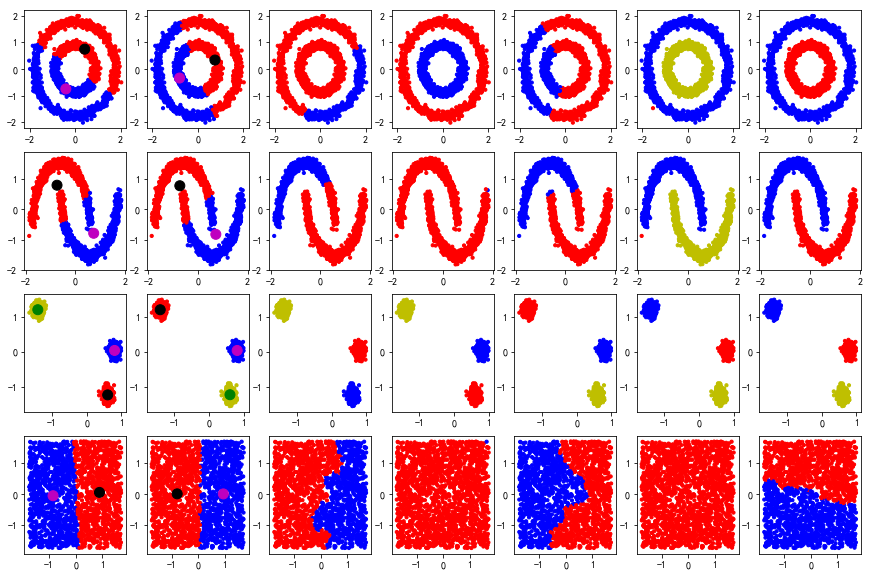

In [58]:
clusters_names = ['KMeans','MinibatchKMeas','AC-ward','AC-average',
                  'Birch','DBSCAN','SpectralClustering']

plt.figure(figsize=(15,10),facecolor='w')

cm = mpl.colors.ListedColormap(list('ryb'))
cm2 = mpl.colors.ListedColormap(list('kgm'))

plt_i = 1 #用来更新子图
n_cluster = 2

X = StandardScaler().fit_transform(circles)
connectivity = kneighbors_graph(X,n_neighbors=10,include_self=False)#计算X中k各近邻点 对应的权重
connectivity = 0.5 * (connectivity + connectivity.T)
    
km = cluster.KMeans(n_clusters=n_cluster)
mbkm = cluster.MiniBatchKMeans(n_clusters=n_cluster)
ward = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='ward')
average = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='average')
birch = cluster.Birch(n_clusters=n_cluster)
dbscan = cluster.DBSCAN(eps=.2)
spectral = cluster.SpectralClustering(n_clusters=n_cluster, eigen_solver='arpack', affinity="nearest_neighbors")
clustering_algorithms = [km, mbkm, ward, average, birch, dbscan, spectral]
for algor in clustering_algorithms:
    t0 = time.time()
    algor.fit(X)
    if hasattr(algor, 'labels_'):
        y_pre = algor.labels_.astype(np.int)
    else:
        y_pre = algor.predict(X)
    
    plt.subplot(4,7,plt_i)
    plt.scatter(X[:,0],X[:,1],c = y_pre,cmap = cm,s = 10)
    if hasattr(algor, 'cluster_centers_'):
        plt.scatter(algor.cluster_centers_[:,0],algor.cluster_centers_[:,1],c = range(n_cluster),s = 100,cmap = cm2)
    
    plt_i+=1

X1 = StandardScaler().fit_transform(moons)
connectivity = kneighbors_graph(X1,n_neighbors=10,include_self=False)#计算X中k各近邻点 对应的权重
connectivity = 0.5 * (connectivity + connectivity.T)
plt_i = 0
for algor in clustering_algorithms:
    t0 = time.time()
    algor.fit(X1)
    if hasattr(algor, 'labels_'):
        y_pre = algor.labels_.astype(np.int)
    else:
        y_pre = algor.predict(X1)
    
    plt.subplot(4,7,8+plt_i)
    plt.scatter(X1[:,0],X1[:,1],c = y_pre,cmap = cm,s = 10)
    if hasattr(algor, 'cluster_centers_'):
        plt.scatter(algor.cluster_centers_[:,0],algor.cluster_centers_[:,1],c = range(n_cluster),s = 100,cmap = cm2)
    
    plt_i+=1 


n_cluster = 3 
X2 = StandardScaler().fit_transform(blobs)
connectivity = kneighbors_graph(X2,n_neighbors=10,include_self=False)#计算X中k各近邻点 对应的权重
connectivity = 0.5 * (connectivity + connectivity.T)
km = cluster.KMeans(n_clusters=n_cluster)
mbkm = cluster.MiniBatchKMeans(n_clusters=n_cluster)
ward = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='ward')
average = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='average')
birch = cluster.Birch(n_clusters=n_cluster)
dbscan = cluster.DBSCAN(eps=.2)
spectral = cluster.SpectralClustering(n_clusters=n_cluster, eigen_solver='arpack', affinity="nearest_neighbors")
clustering_algorithms = [km, mbkm, ward, average, birch, dbscan, spectral]    
plt_i = 0
for algor in clustering_algorithms:
    t0 = time.time()
    algor.fit(X2)
    if hasattr(algor, 'labels_'):
        y_pre = algor.labels_.astype(np.int)
    else:
        y_pre = algor.predict(X2)
    
    plt.subplot(4,7,15+plt_i)
    plt.scatter(X2[:,0],X2[:,1],c = y_pre,cmap = cm,s = 10)
    if hasattr(algor, 'cluster_centers_'):
        plt.scatter(algor.cluster_centers_[:,0],algor.cluster_centers_[:,1],c = range(n_cluster),s = 100,cmap = cm2)
    
    plt_i+=1

n_cluster = 2 
X3 = StandardScaler().fit_transform(no_structure)
connectivity = kneighbors_graph(X3,n_neighbors=10,include_self=False)#计算X中k各近邻点 对应的权重
connectivity = 0.5 * (connectivity + connectivity.T)
km = cluster.KMeans(n_clusters=n_cluster)
mbkm = cluster.MiniBatchKMeans(n_clusters=n_cluster)
ward = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='ward')
average = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='average')
birch = cluster.Birch(n_clusters=n_cluster)
dbscan = cluster.DBSCAN(eps=.2)
spectral = cluster.SpectralClustering(n_clusters=n_cluster, eigen_solver='arpack', affinity="nearest_neighbors")
clustering_algorithms = [km, mbkm, ward, average, birch, dbscan, spectral]    

plt_i = 0
for algor in clustering_algorithms:
    t0 = time.time()
    algor.fit(X3)
    if hasattr(algor, 'labels_'):
        y_pre = algor.labels_.astype(np.int)
    else:
        y_pre = algor.predict(X3)
    
    plt.subplot(4,7,22+plt_i)
    plt.scatter(X3[:,0],X3[:,1],c = y_pre,cmap = cm,s = 10)
    if hasattr(algor, 'cluster_centers_'):
        plt.scatter(algor.cluster_centers_[:,0],algor.cluster_centers_[:,1],c = range(n_cluster),s = 100,cmap = cm2)
    
    plt_i+=1    